In [ ]:
!pip install rasterio geopandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 39.5 MB/s eta 0:00:00


### **Membaca Data**


---


membaca data GeoTIFF dan Shapefile menggunakan rasterio dan geopandas.




In [ ]:
import os
import rasterio
import geopandas as gpd
from rasterio.mask import mask

# Path ke direktori data dan shapefile
data_dir = '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020'
shapefile_path = '/content/drive/MyDrive/DATA SHP/RBI_50K_2023_Riau.shp'

# Membaca shapefile Riau
riau_shapefile = gpd.read_file(shapefile_path)

# Filter shapefile untuk hanya wilayah Riau
riau_filtered = riau_shapefile[riau_shapefile['WADMPR'].str.contains('Riau')]


Missing values in shapefile:
NAMOBJ         0
FCODE          0
REMARK        12
METADATA       0
SRS_ID         0
KDBBPS        12
KDCBPS        12
KDCPUM        12
KDEBPS        12
KDEPUM        12
KDPBPS        12
KDPKAB         0
KDPPUM         0
LUASWH         0
TIPADM         0
WADMKC        12
WADMKD        12
WADMKK         0
WADMPR         0
WIADKC        12
WIADKK         5
WIADPR        12
WIADKD         0
SHAPE_Leng     0
SHAPE_Area     0
geometry       0
dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Cleaning Data**

---

Untuk memastikan data yang digunakan valid dan tidak ada yang hilang

In [ ]:
# Cek missing values di shapefile
print("data Riau shapefile:")
print(riau_filtered.isnull().sum())

# Pengecekan setiap file GeoTIFF apakah ada data yang rusak atau tidak lengkap
def check_tiff_integrity(tiff_path):
    try:
        with rasterio.open(tiff_path) as src:
            data = src.read(1)  # Membaca data dari file GeoTIFF
            print(f"{os.path.basename(tiff_path)}: OK")
    except Exception as e:
        print(f"{os.path.basename(tiff_path)}: ERROR - {str(e)}")

# Daftar dan hitung file GeoTIFF
tiff_files = [f for f in os.listdir(data_dir) if f.endswith('.tif')]
print(f"\nJumlah file GeoTIFF: {len(tiff_files)}")

# Loop untuk mengecek semua file GeoTIFF
print("\nMemeriksa integritas file GeoTIFF:")
for tiff_file in sorted(tiff_files):
    check_tiff_integrity(os.path.join(data_dir, tiff_file))

data Riau shapefile:
NAMOBJ         0
FCODE          0
REMARK        12
METADATA       0
SRS_ID         0
KDBBPS        12
KDCBPS        12
KDCPUM        12
KDEBPS        12
KDEPUM        12
KDPBPS        12
KDPKAB         0
KDPPUM         0
LUASWH         0
TIPADM         0
WADMKC        12
WADMKD        12
WADMKK         0
WADMPR         0
WIADKC        12
WIADKK         5
WIADPR        12
WIADKD         0
SHAPE_Leng     0
SHAPE_Area     0
geometry       0
dtype: int64

Jumlah file GeoTIFF: 480

Memeriksa integritas file GeoTIFF:
Clipped_Suhu_Permukaan_Riau_2001_01.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_02.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_03.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_04.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_05.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_06.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_07.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_08.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_09.tif: OK
Clipped_Suhu_Permukaan_Riau_2001_10.tif: OK
Clipped_Suhu_Permukaan

### **Normalisasi Data**

---

Normalisasi data bisa dilakukan dengan memeriksa rentang nilai dari data suhu. Karena data sudah dikonversi dari Kelvin ke Celsius di GEE, langkah ini lebih ke arah pengecekan ulang nilai dan melakukan pemotongan atau normalisasi.

In [ ]:
def normalize_raster_data(tiff_path, riau_geom):
    with rasterio.open(tiff_path) as src:
        out_image, out_transform = mask(src, riau_geom, crop=True)
        out_meta = src.meta

    # Menyimpan hasil klip ke file GeoTIFF baru
    clipped_tiff_path = os.path.join(data_dir, f"Clipped_{os.path.basename(tiff_path)}")
    out_meta.update({"driver": "GTiff", "height": out_image.shape[1], "width": out_image.shape[2], "transform": out_transform})

    with rasterio.open(clipped_tiff_path, "w", **out_meta) as dest:
        dest.write(out_image)

    return clipped_tiff_path

# Normalisasi dan klip semua data
clipped_files = []
for tiff_file in sorted(os.listdir(data_dir)):
    if tiff_file.endswith('.tif'):
        clipped_file = normalize_raster_data(os.path.join(data_dir, tiff_file), riau_filtered.geometry)
        clipped_files.append(clipped_file)


In [ ]:
clipped_files

['/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020/Clipped_Suhu_Permukaan_Riau_2001_01.tif',
 '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020/Clipped_Suhu_Permukaan_Riau_2001_02.tif',
 '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020/Clipped_Suhu_Permukaan_Riau_2001_03.tif',
 '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020/Clipped_Suhu_Permukaan_Riau_2001_04.tif',
 '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020/Clipped_Suhu_Permukaan_Riau_2001_05.tif',
 '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020/Clipped_Suhu_Permukaan_Riau_2001_06.tif',
 '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020/Clipped_Suhu_Permukaan_Riau_2001_07.tif',
 '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Ria

### **Penggabungan Data**

---
menggabungkan data suhu dengan shapefile Riau untuk analisis lebih lanjut.

In [ ]:
import rasterio
import numpy as np

# Fungsi untuk menghitung suhu rata-rata tanpa NaN
def calculate_average_temperature(tiff_path):
    with rasterio.open(tiff_path) as src:
        data = src.read(1)

        # Mengabaikan nilai NaN dan nilai nodata yang ditentukan
        valid_data = data[data != src.nodata]
        valid_data = valid_data[~np.isnan(valid_data)]

        if valid_data.size > 0:
            average_temp = np.mean(valid_data)
            print(f"Suhu rata-rata untuk file {os.path.basename(tiff_path)}: {average_temp:.2f} °C")
        else:
            print(f"Tidak ada data valid di file {os.path.basename(tiff_path)}.")

# Loop untuk menghitung suhu rata-rata di semua file
for tiff_file in sorted(os.listdir(data_dir)):
    if tiff_file.endswith('.tif'):
        calculate_average_temperature(os.path.join(data_dir, tiff_file))


Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_01.tif: 12.25 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_02.tif: 13.50 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_03.tif: 13.51 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_04.tif: 13.13 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_05.tif: 13.40 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_06.tif: 13.34 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_07.tif: 13.40 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_08.tif: 13.14 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_09.tif: 13.51 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_10.tif: 13.93 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_11.tif: 9.97 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2001_12.tif: 12.99 °C
Suhu rata-rata untuk file Clipped_Suhu_Permukaan_Riau_2002_01.tif: 11.47 °C
Suhu rata-rat

### **Visualisasi dan Analisis Lanjutan**

---

membuat visualisasi untuk setiap bulan/tahun dan memeriksa trend suhu rata-rata

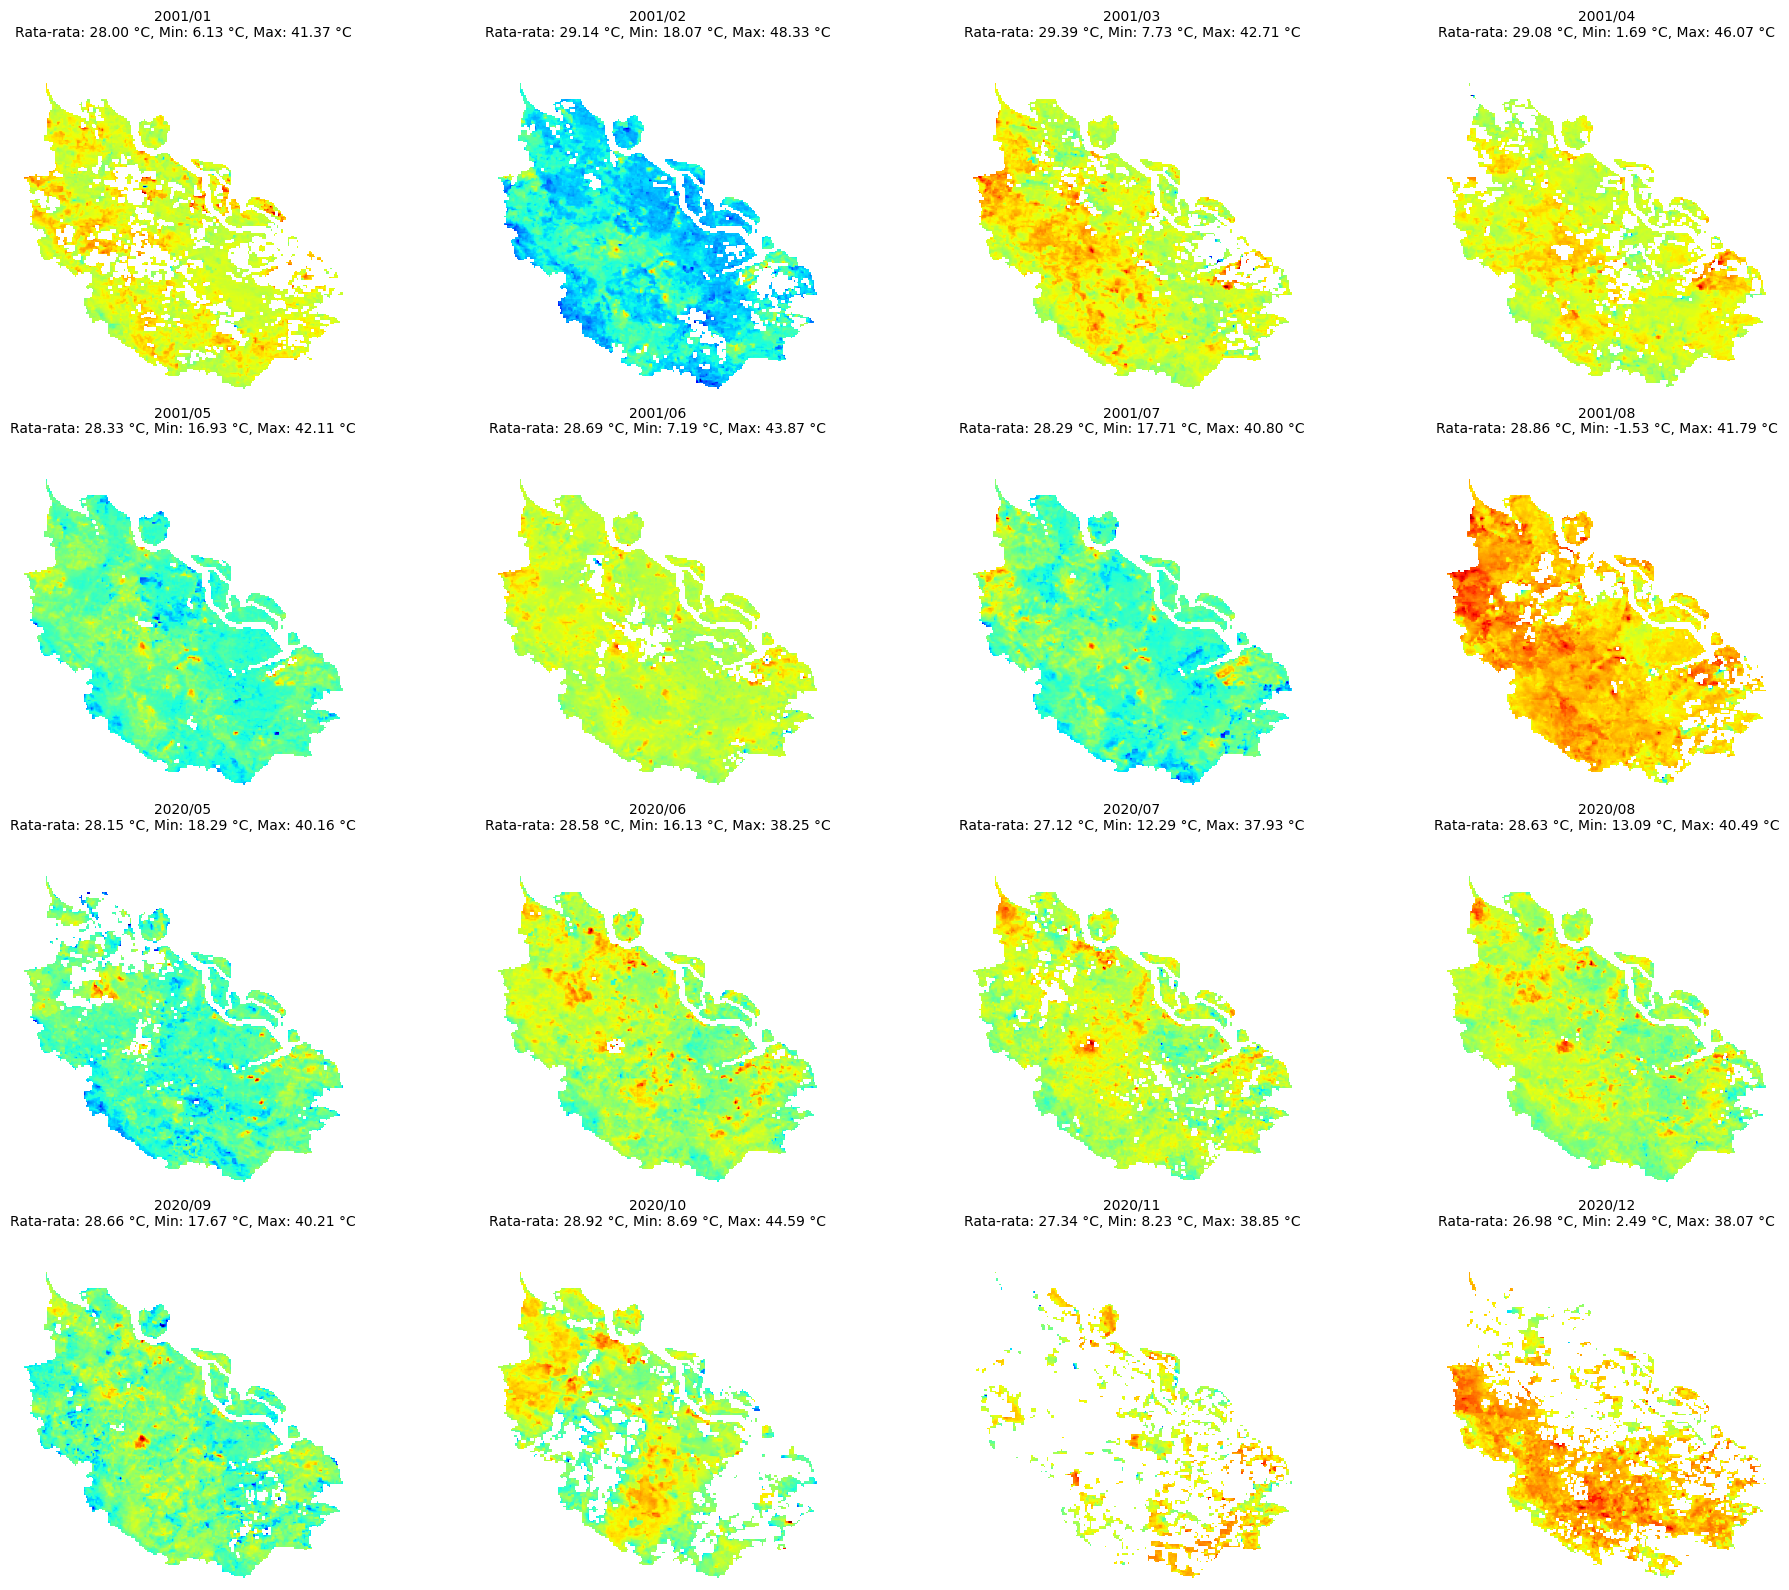

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt


# Path ke shapefile
shapefile_path = '/content/drive/MyDrive/DATA SHP/RBI_50K_2023_Riau.shp'

folder_path = '/content/drive/MyDrive/Data Citra Satelit Modis Suhu Permukaan Wilayah Riau 2001 - 2020/'

# Membaca shapefile
gdf = gpd.read_file(shapefile_path)

# Menggabungkan seluruh geometri dalam shapefile menjadi satu
geom_riau = gdf.unary_union

# Menyimpan semua gambar dalam daftar untuk ditampilkan dalam grid
images = []
titles = []

# Loop melalui setiap tahun dan bulan
for tahun in range(2001, 2021):
    for bulan in range(1, 13):
        file_path = f'{folder_path}Suhu_Permukaan_Riau_{tahun}_{bulan:02d}.tif'

        try:
            # Membaca citra suhu
            with rasterio.open(file_path) as src:
                # Potong citra berdasarkan geometri seluruh Riau
                out_image, out_transform = mask(src, [geom_riau], crop=True)

                # Menghilangkan nilai nodata
                nodata = src.nodata
                out_image = out_image.astype(float)  # Pastikan tipe data adalah float

                # Ubah semua nilai yang tidak valid (misalnya, 0 atau nilai lain) menjadi NaN
                out_image[out_image == 0] = np.nan
                if nodata is not None:
                    out_image[out_image == nodata] = np.nan

                # Simpan citra dan judulnya
                images.append(out_image)
                titles.append(f'{tahun}/{bulan:02d}\nRata-rata: {np.nanmean(out_image):.2f} °C, Min: {np.nanmin(out_image):.2f} °C, Max: {np.nanmax(out_image):.2f} °C')

        except Exception as e:
            print(f'Error processing file {file_path}: {e}')

# Tentukan ukuran grid
n_cols = 4  # Jumlah Kolom
n_rows = 4  # Jumlah Baris

# Bagi gambar menjadi dua bagian: awal dan akhir
half_point = len(images) // 2
images_awal = images[:half_point]
images_akhir = images[half_point:]

# Gabungkan menjadi 4 baris
images_to_plot = images_awal[:n_cols * 2] + images_akhir[-n_cols * 2:]
titles_to_plot = titles[:half_point][:n_cols * 2] + titles[half_point:][-n_cols * 2:]

# Membuat grid plot
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Plot setiap gambar dalam grid
for i in range(len(images_to_plot)):
    row = i // n_cols
    col = i % n_cols
    ax = axs[row, col]

    # Memastikan data adalah 2D dengan mengambil channel pertama
    image_data = images_to_plot[i]
    if image_data.ndim == 3:
        image_data = image_data[0]  # Ambil channel pertama

    ax.imshow(image_data, cmap='jet', extent=(0, image_data.shape[1], 0, image_data.shape[0]), origin='upper')
    ax.set_title(titles_to_plot[i], fontsize=10)
    ax.axis('off')

# Hapus sumbu kosong jika jumlah gambar tidak genap sesuai grid
for j in range(len(images_to_plot), n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

# Sesuaikan layout
plt.tight_layout()
plt.show()


Nilai unik dalam citra: [ 0.          6.13        9.09       17.31       17.66       17.79
 18.25       19.93       20.02       20.09       20.23       20.51
 20.98       21.34       21.49       21.65       21.79       21.93
 21.95       22.06       22.14333333 22.31       22.41       22.49
 22.52       22.56       22.60333333 22.63       22.83       22.99
 23.01       23.03666667 23.15       23.15666667 23.29       23.4
 23.43       23.45       23.46333333 23.47       23.51       23.57
 23.58       23.69       23.75       23.79       23.87       23.91
 23.95       24.02333333 24.05       24.07       24.09       24.12
 24.13       24.13666667 24.17       24.21       24.24333333 24.25
 24.27       24.31       24.32       24.34       24.35       24.36
 24.41       24.43       24.44       24.445      24.45       24.49
 24.52       24.53       24.55       24.57       24.61       24.63
 24.65       24.66       24.67       24.69       24.71       24.72
 24.76       24.77       24.77666667 24

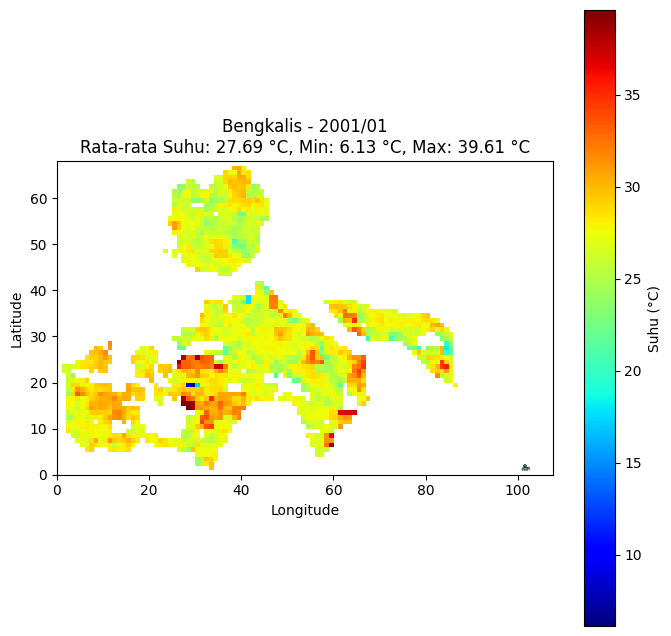

Nilai unik dalam citra: [ 0.         21.11       21.31       22.33666667 22.54       22.81
 23.09       23.19       23.27       23.29       23.49       23.71
 23.89       23.99       23.99666667 24.05       24.24       24.27
 24.29       24.35       24.41       24.43       24.47       24.48333333
 24.5        24.53       24.55       24.61       24.65       24.67
 24.68       24.69       24.71       24.73666667 24.75       24.79
 24.81       24.89       24.91       24.92       24.97666667 24.99
 25.01       25.02333333 25.05       25.07       25.08       25.18
 25.21       25.23       25.29       25.33       25.34333333 25.37
 25.39       25.41       25.44       25.45666667 25.48       25.48333333
 25.49       25.5        25.52333333 25.53       25.55       25.61
 25.63       25.65       25.66       25.67       25.68       25.71
 25.74       25.77       25.77666667 25.78333333 25.79       25.8
 25.81       25.83       25.85       25.86       25.86333333 25.87
 25.88       25.89       25

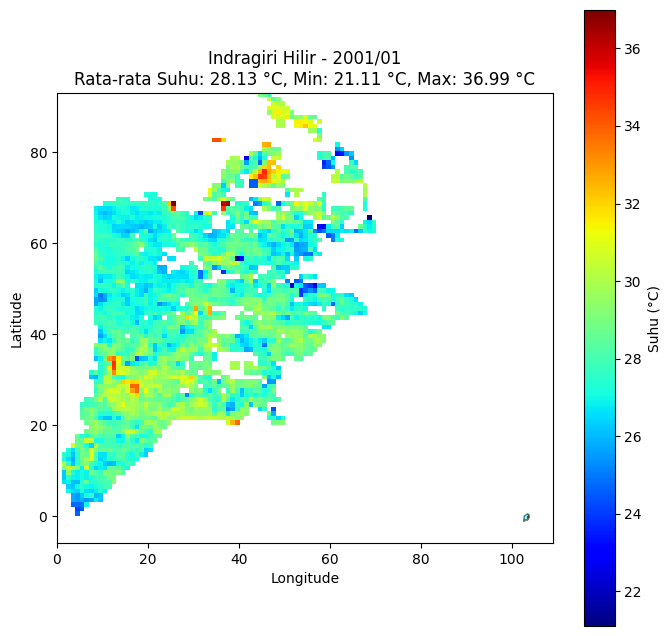

Nilai unik dalam citra: [ 0.   12.93 13.39 14.25 14.71 14.83 15.77 17.55 19.47 20.69 21.79 21.93
 22.03 22.15 22.61 22.75 22.87 22.95 22.97 23.05 23.07 23.11 23.13 23.25
 23.29 23.37 23.51 23.59 23.69 23.71 23.73 23.75 23.86 23.87 23.89 23.99
 24.07 24.13 24.16 24.17 24.21 24.25 24.33 24.35 24.37 24.39 24.45 24.47
 24.5  24.51 24.53 24.57 24.62 24.63 24.65 24.67 24.73 24.75 24.79 24.8
 24.81 24.83 24.84 24.87 24.88 24.89 24.9  24.95 24.97 24.98 24.99 25.
 25.01 25.03 25.05 25.07 25.09 25.11 25.12 25.15 25.17 25.18 25.19 25.21
 25.23 25.24 25.25 25.29 25.3  25.31 25.32 25.33 25.35 25.36 25.37 25.39
 25.4  25.41 25.42 25.43 25.44 25.45 25.47 25.48 25.49 25.5  25.51 25.53
 25.56 25.57 25.6  25.61 25.62 25.65 25.66 25.67 25.68 25.69 25.7  25.71
 25.72 25.73 25.75 25.77 25.78 25.79 25.8  25.81 25.82 25.83 25.84 25.85
 25.86 25.87 25.88 25.89 25.9  25.91 25.93 25.94 25.95 25.96 25.97 25.98
 25.99 26.   26.01 26.02 26.03 26.05 26.06 26.07 26.08 26.09 26.1  26.11
 26.13 26.15 26.16 26.17 26.18

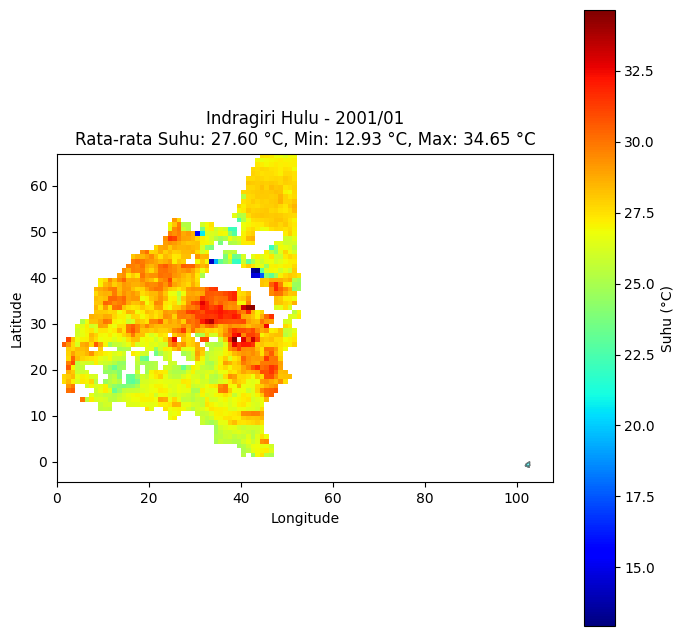

Nilai unik dalam citra: [ 0.         17.91       20.67       20.97       21.29       21.53
 21.77       21.83       22.07       22.39       22.5        22.51
 22.55       22.68       22.76       22.79       23.06       23.11
 23.13       23.19       23.23       23.35       23.39       23.43
 23.55       23.57       23.65       23.7        23.73       23.75
 23.77       23.81       23.83       23.85       23.88       23.95
 24.01       24.03       24.05       24.1        24.19       24.21
 24.22       24.23       24.27       24.29       24.3        24.31
 24.34       24.35       24.37       24.38       24.39       24.41
 24.43       24.47       24.5        24.51       24.52333333 24.53
 24.54       24.55       24.57       24.61       24.63       24.65
 24.67       24.68       24.69       24.71       24.73       24.75
 24.77       24.79       24.81       24.83       24.86       24.89
 24.91       24.93       24.95       24.98       24.99       25.01
 25.02       25.03       25.05       2

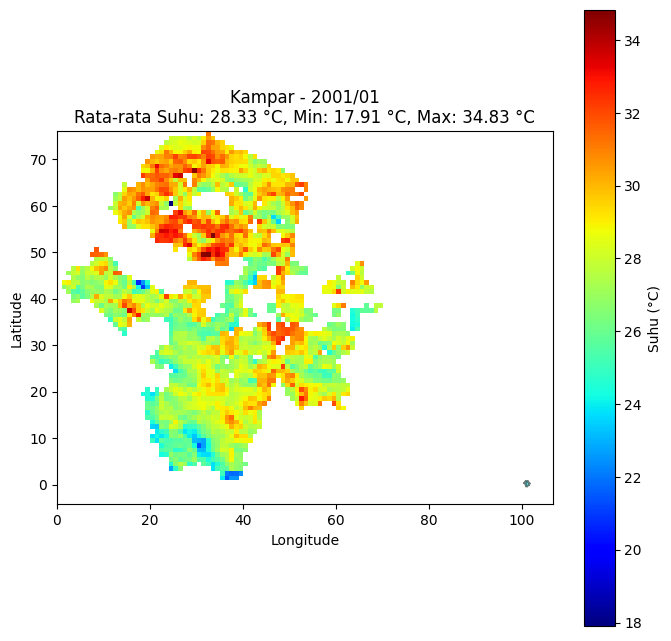

Nilai unik dalam citra: [ 0.         17.8        18.1        18.45       20.3        20.74
 21.58       22.41       22.67       22.71       22.89       23.09
 23.49       23.60333333 23.61       23.73       24.37       24.41
 24.49       24.53       24.58       24.65       24.65666667 24.73
 24.78       24.87666667 24.93       25.04       25.07       25.11
 25.13       25.15       25.2        25.21       25.23       25.25
 25.27       25.29666667 25.33       25.39       25.41       25.43666667
 25.44333333 25.47       25.51       25.53       25.55       25.56
 25.57       25.58333333 25.59       25.61       25.63666667 25.64
 25.67       25.69       25.75666667 25.77666667 25.78       25.81
 25.83       25.84       25.85       25.88       25.89       25.91
 25.93       25.94       25.97       25.99       25.99666667 26.03
 26.035      26.04333333 26.05       26.05666667 26.09       26.1
 26.11       26.13       26.15       26.16       26.17       26.17666667
 26.19       26.21       26

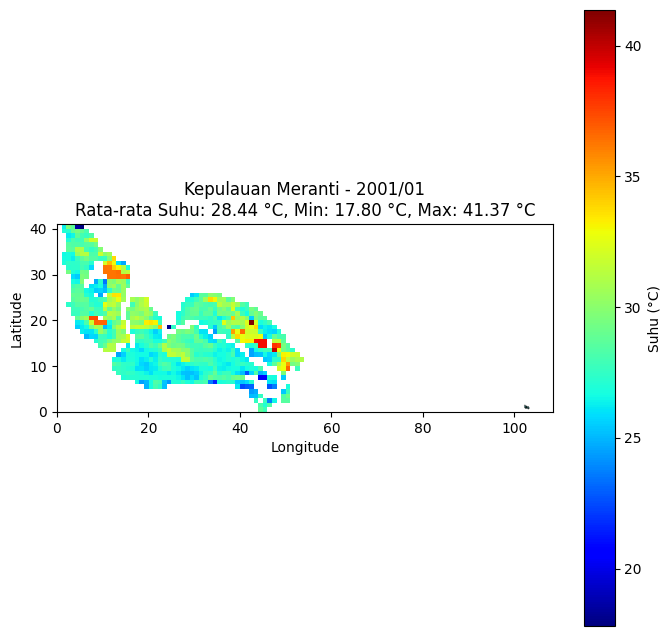

Nilai unik dalam citra: [ 0.         22.13       22.42       23.11       23.53       23.55
 23.91       24.31       24.45       24.47       24.67       24.71
 24.81       24.98       25.03       25.08       25.09       25.19
 25.22       25.25       25.33       25.34       25.34333333 25.44333333
 25.45       25.5        25.52333333 25.55666667 25.59       25.6
 25.63       25.67       25.68       25.69       25.71       25.72
 25.73       25.74       25.75       25.77       25.79666667 25.81666667
 25.85       25.86       25.87       25.88       25.89       25.89666667
 25.91       25.94       25.95       25.97       26.02       26.03
 26.07       26.08       26.09       26.11       26.14       26.15
 26.16       26.17       26.18333333 26.23       26.25       26.29
 26.3        26.31       26.35       26.38333333 26.41       26.42
 26.43666667 26.45       26.47       26.47666667 26.49       26.5
 26.51       26.55       26.56       26.57       26.58       26.62
 26.63       26.64    

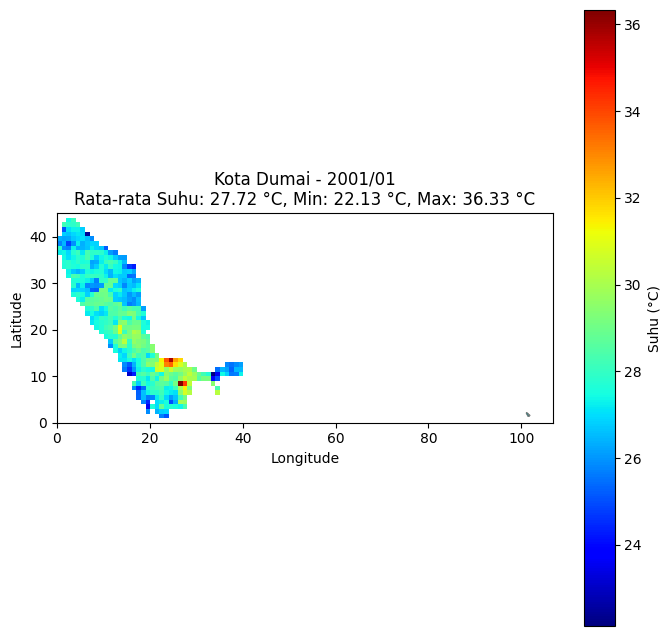

Nilai unik dalam citra: [ 0.   24.89 26.47 27.09 27.17 27.33 28.03 28.07 28.09 28.17 28.27 28.49
 28.53 28.85 28.89 29.13 29.23 29.25 29.29 29.47 29.51 29.71 29.81 29.83
 29.91 29.97 30.07 30.25 30.33 30.49 30.55 30.67 30.79 30.89 30.95 30.97
 31.01 31.09 31.15 31.25 31.29 31.33 31.39 31.47 31.49 31.53 31.73 31.75
 32.09 32.11 32.23 32.25 32.43 32.59 32.67 32.79 32.81 32.89 32.91 32.93
 33.39 33.63 34.01 34.83   nan]


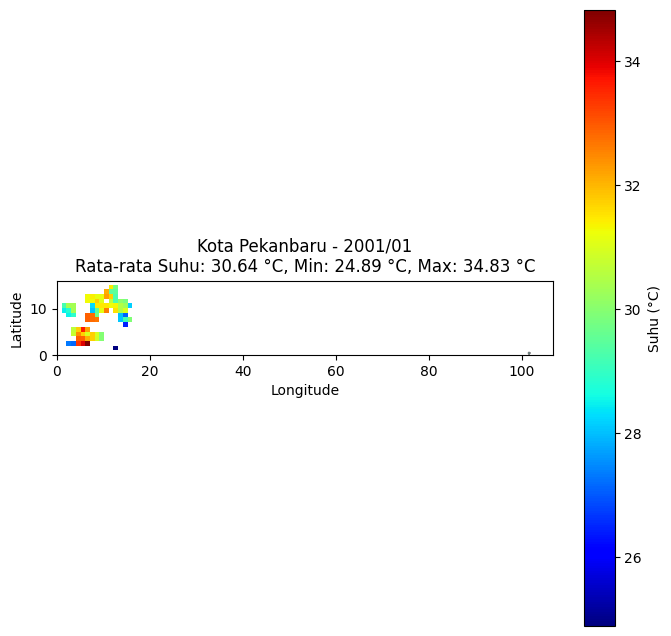

Nilai unik dalam citra: [ 0.         21.27       21.85       22.2        22.25       22.94
 22.97       23.28       23.4        23.41       23.5        24.06
 24.09       24.1        24.17       24.18       24.31       24.35
 24.39       24.4        24.45       24.47       24.49       24.59
 24.61       24.71       24.77       24.84       24.86       24.93
 25.07       25.14       25.21       25.23       25.25       25.27
 25.28       25.3        25.31       25.35       25.37       25.38
 25.39       25.41       25.43       25.44       25.45       25.47666667
 25.48       25.49       25.5        25.51       25.55       25.56
 25.57       25.59       25.61       25.63       25.64       25.65
 25.66       25.67       25.69       25.7        25.71       25.72
 25.73       25.75       25.77       25.78       25.85       25.86
 25.87       25.88       25.89       25.9        25.94       25.95
 25.96       25.97       26.01       26.02       26.05       26.07
 26.12       26.13       26.14  

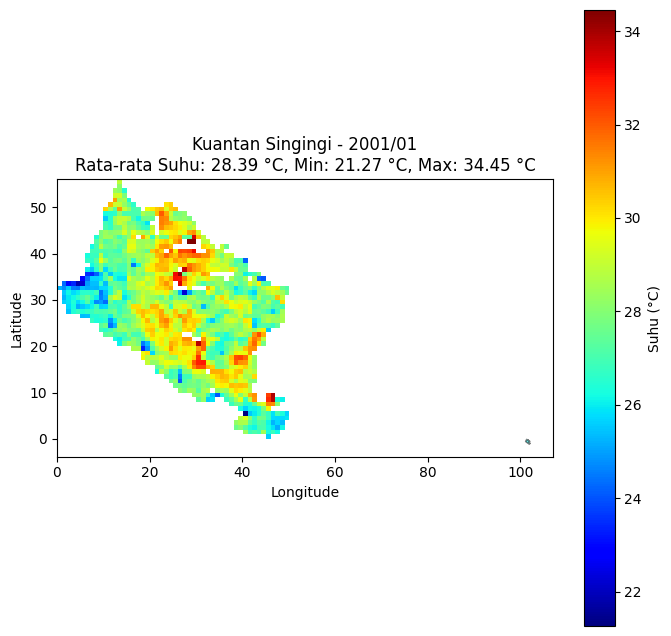

Nilai unik dalam citra: [ 0.         14.59       18.53       18.93       19.39       19.65
 19.77       20.33       20.42       20.43       21.29       21.53
 21.87       23.01       23.11       23.27       23.28       23.65
 23.85       23.89       23.91       23.95       24.06       24.07
 24.13       24.21       24.25       24.27       24.29       24.31
 24.32       24.37       24.41       24.43       24.49       24.5
 24.51       24.53       24.65       24.67       24.68       24.69
 24.73       24.74       24.75       24.8        24.81       24.83
 24.84       24.85       24.9        24.91       24.92       24.93
 24.95       24.97       24.98       25.01       25.07       25.09
 25.11       25.12       25.15       25.16       25.17       25.18
 25.19       25.22       25.23       25.24       25.25       25.27
 25.3        25.31       25.33       25.35       25.37       25.38
 25.41       25.42       25.43       25.45       25.46       25.47
 25.5        25.51       25.53       25

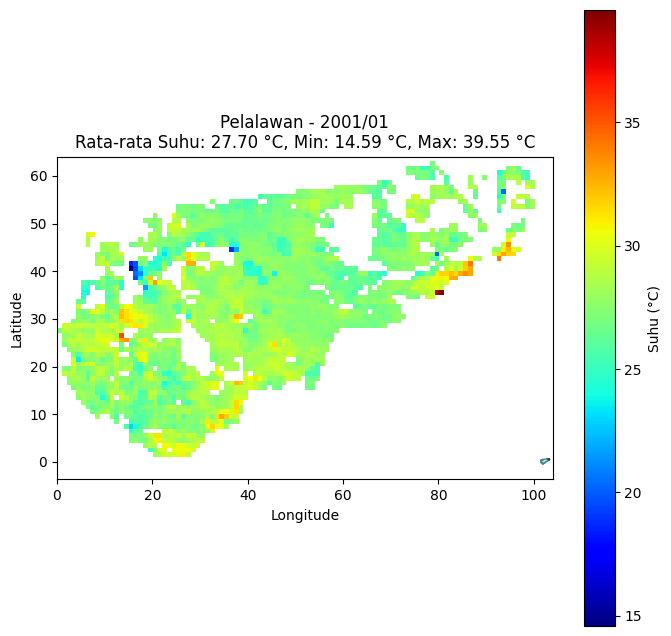

Nilai unik dalam citra: [ 0.         20.63       21.08333333 21.43       21.93       21.97
 22.13       22.25       22.31       22.44333333 22.67       22.68333333
 22.79       22.87       23.11       23.19       23.25       23.41
 23.46333333 23.48       23.51       23.53       23.6        23.61
 23.63       23.67       23.71       23.72333333 23.77       23.81
 23.89       23.92       23.95       24.03       24.06       24.07
 24.07666667 24.08       24.09666667 24.11       24.13       24.16
 24.17       24.19       24.24333333 24.27       24.29       24.31
 24.35       24.43666667 24.49       24.53       24.54       24.55666667
 24.585      24.59       24.61       24.62       24.63       24.66
 24.68       24.68333333 24.685      24.71       24.73666667 24.74
 24.75666667 24.8        24.82       24.83       24.85       24.87
 24.87666667 24.89666667 24.96333333 24.98333333 24.99       24.99666667
 25.01       25.02       25.03666667 25.06333333 25.07       25.08333333
 25.09       2

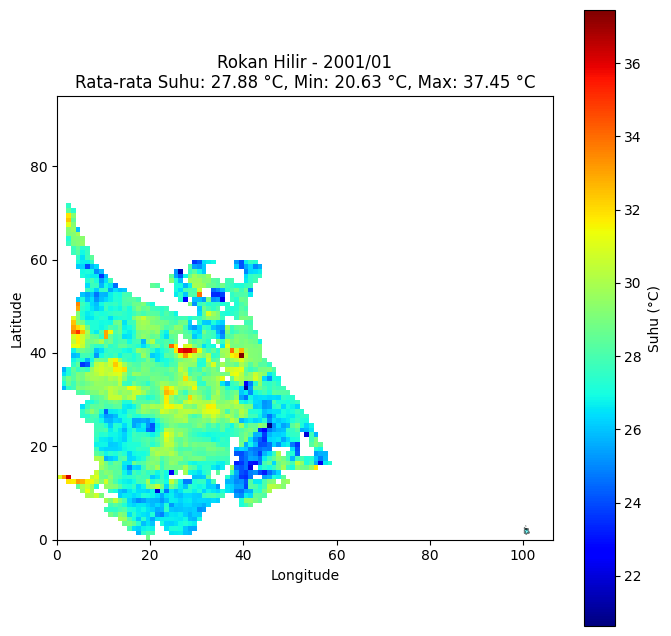

Nilai unik dalam citra: [ 0.         19.07       19.75       19.95       20.25       21.31
 21.93       22.39       22.97       23.51       23.65       23.69
 23.74       23.75       23.8        23.81       24.01       24.02
 24.03       24.05       24.13       24.15       24.19       24.23
 24.34       24.35       24.38       24.41       24.43       24.49
 24.51       24.65       24.67       24.69       24.73       24.75
 24.77       24.81       24.83       24.89       24.93       24.97
 24.99       25.03       25.04       25.05       25.07       25.08
 25.09       25.11       25.12       25.13       25.15       25.17
 25.18       25.2        25.21       25.23       25.24       25.25
 25.27       25.29       25.33       25.35       25.36       25.38
 25.39       25.41       25.43       25.45       25.47       25.49
 25.51       25.53       25.55       25.57       25.59       25.61
 25.63       25.65       25.66       25.67       25.68       25.69
 25.71       25.72       25.73       2

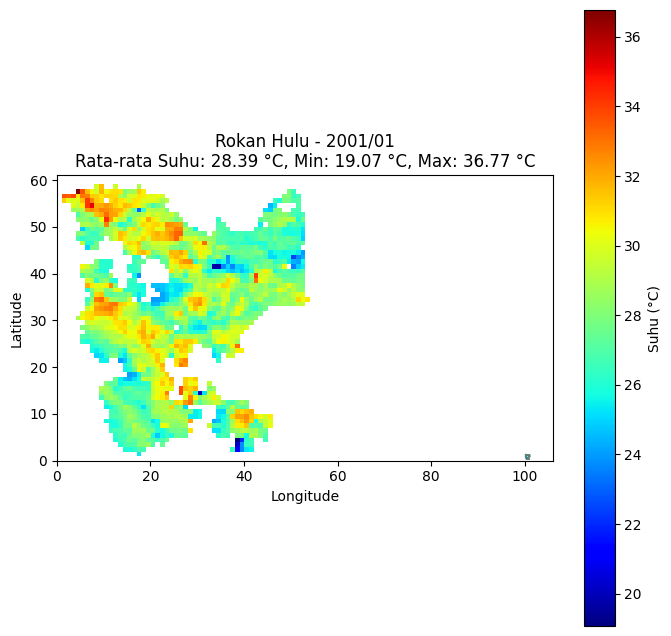

Nilai unik dalam citra: [ 0.         20.17       20.29       20.89       21.76333333 21.80333333
 21.85       22.21       22.45       22.63       23.05       23.07
 23.09       23.25       23.33       23.47       23.49       23.53
 23.69       23.83       24.05       24.11       24.15       24.17
 24.18       24.23       24.25       24.27       24.45       24.47
 24.51       24.53       24.57       24.63       24.65       24.67
 24.69       24.73       24.77       24.78       24.79       24.80333333
 24.83       24.85       24.86       24.88       24.91       24.93
 24.94       24.95       24.97       25.01666667 25.05       25.07
 25.10333333 25.11666667 25.12       25.13       25.17       25.18
 25.19       25.21       25.23       25.25       25.27       25.31
 25.35       25.39       25.42       25.43       25.45       25.47
 25.49       25.495      25.51       25.53       25.55       25.57
 25.58       25.59       25.61       25.61666667 25.62333333 25.63
 25.65       25.67       2

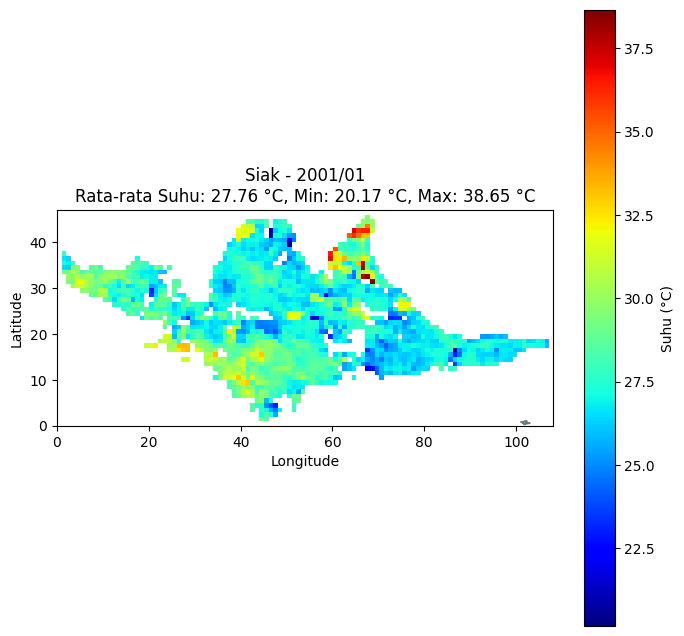

In [ ]:
for idx, row in gdf.iterrows():
    tahun = 2001
    bulan = 1
    file_path = f'{folder_path}Suhu_Permukaan_Riau_{tahun}_{bulan:02d}.tif'

    try:
        # Membaca citra suhu
        with rasterio.open(file_path) as src:
            # Potong citra berdasarkan geometri
            geom = [row['geometry']]
            out_image, out_transform = mask(src, geom, crop=True)

            # Menghilangkan nilai nodata
            nodata = src.nodata
            out_image = out_image.astype(float)  # Pastikan tipe data adalah float

            # Identifikasi nilai unik dalam citra
            unique_values = np.unique(out_image)
            print(f"Nilai unik dalam citra: {unique_values}")

            # Ubah semua nilai yang tidak valid (misalnya, 0 atau nilai lain) menjadi NaN
            out_image[out_image == 0] = np.nan
            if nodata is not None:
                out_image[out_image == nodata] = np.nan

            # Hitung nilai statistik
            if out_image.size > 0:
                # Menghitung rata-rata, minimum, dan maksimum
                Suhu_Permukaan_mean = np.nanmean(out_image)  # menggunakan np.nanmean
                Suhu_Permukaan_min = np.nanmin(out_image)    # menggunakan np.nanmin
                Suhu_Permukaan_max = np.nanmax(out_image)    # menggunakan np.nanmax

                # Menyiapkan peta warna (colormap) dengan warna putih untuk NaN
                cmap = plt.cm.jet
                cmap.set_bad(color='white')  # Mengatur warna putih untuk nilai NaN

                # Menampilkan peta
                plt.figure(figsize=(8, 8))
                ax = plt.gca()

                # Memastikan data adalah 2D
                if out_image.ndim == 3:
                    out_image = out_image[0]

                # Tampilkan citra dengan colormap yang telah dimodifikasi
                plt.imshow(out_image, cmap=cmap, extent=(0, out_image.shape[1], 0, out_image.shape[0]), origin='upper')
                plt.colorbar(label='Suhu (°C)')
                plt.title(f'{row["NAMOBJ"]} - {tahun}/{bulan:02d}\nRata-rata Suhu: {Suhu_Permukaan_mean:.2f} °C, Min: {Suhu_Permukaan_min:.2f} °C, Max: {Suhu_Permukaan_max:.2f} °C')

                # Plot geometri wilayah
                gdf.loc[[idx]].plot(ax=ax, edgecolor='black', color='cyan', alpha=0.5)

                plt.xlabel('Longitude')
                plt.ylabel('Latitude')
                plt.show()

                # Tutup figur setelah digunakan
                plt.close()

    except Exception as e:
        print(f'Error processing file {file_path}: {e}')

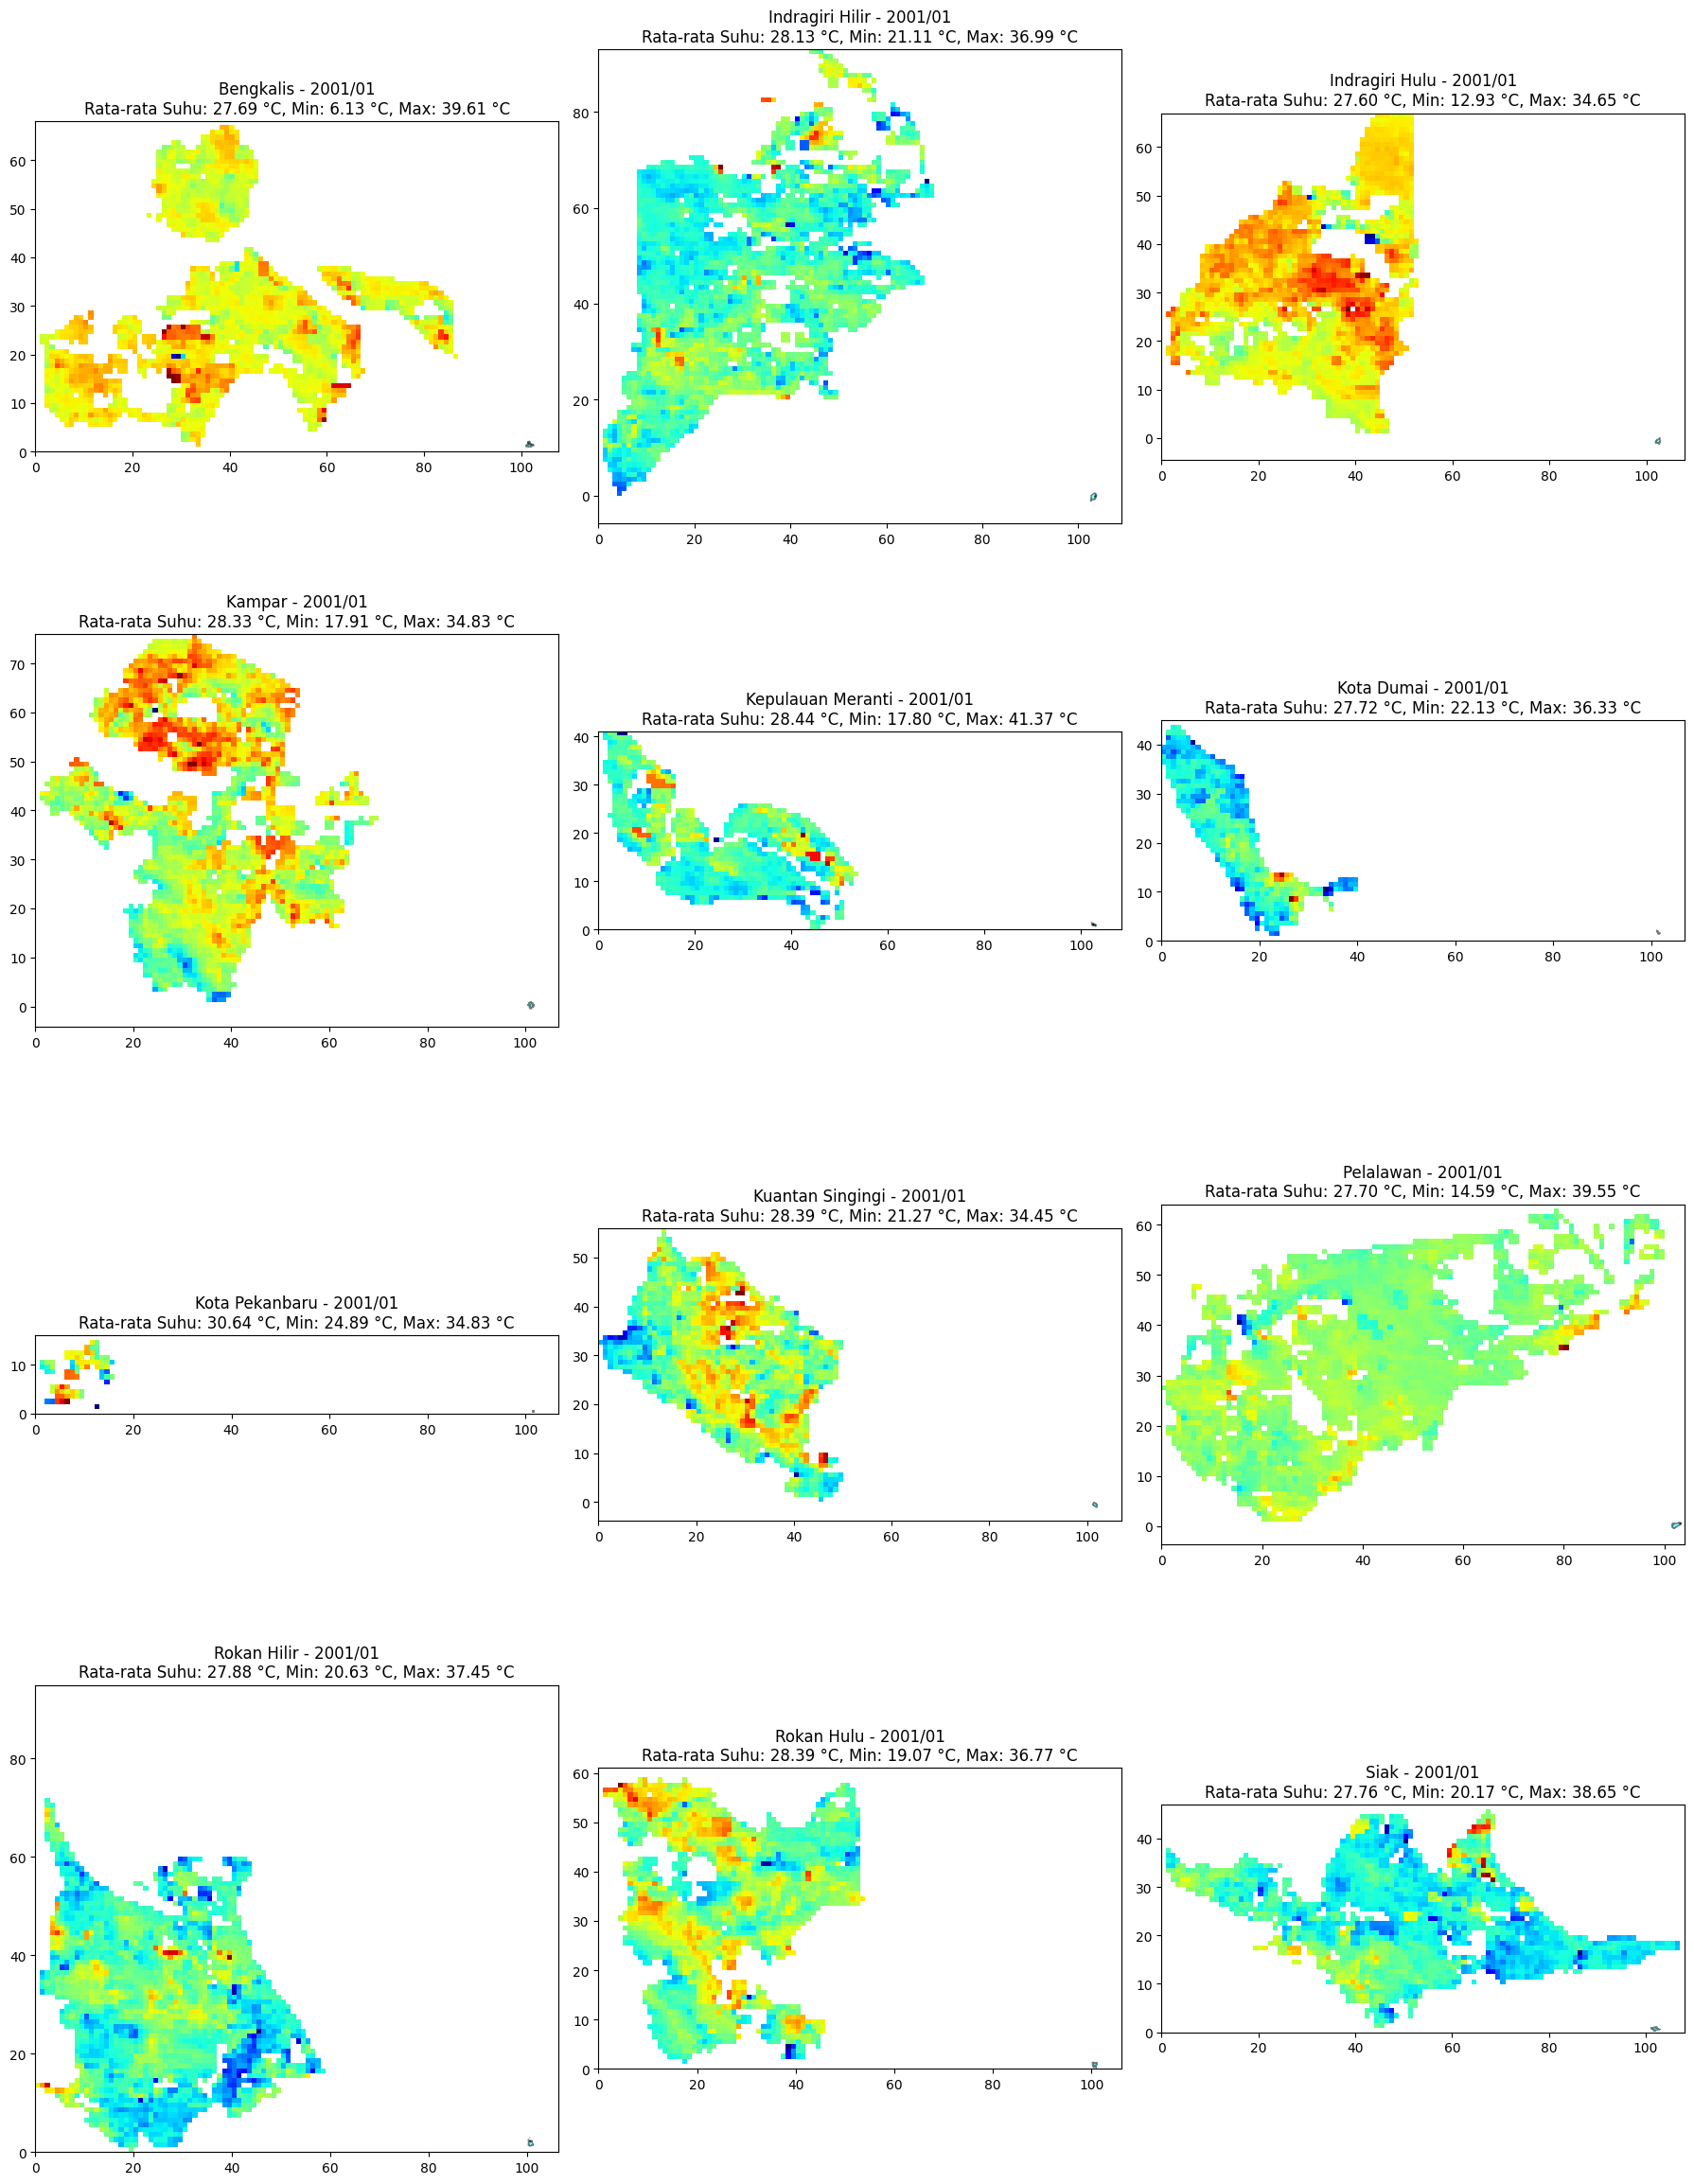

In [ ]:
# Pengaturan grid
n_cols = 3  # Jumlah kolom
n_rows = int(np.ceil(len(gdf) / n_cols))  # Hitung jumlah baris yang diperlukan

# figure dan axes
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))

# Loop melalui setiap daerah
for idx, row in gdf.iterrows():

    tahun = 2001
    bulan = 1
    file_path = f'{folder_path}Suhu_Permukaan_Riau_{tahun}_{bulan:02d}.tif'

    try:
        # Membaca citra suhu
        with rasterio.open(file_path) as src:
            # Potong citra berdasarkan geometri
            geom = [row['geometry']]
            out_image, out_transform = mask(src, geom, crop=True)

            # Menghilangkan nilai nodata
            nodata = src.nodata
            out_image = out_image.astype(float)  # Pastikan tipe data adalah float

            # Identifikasi nilai unik dalam citra
            unique_values = np.unique(out_image)
            # print(f"Nilai unik dalam citra: {unique_values}")

            # Ubah semua nilai yang tidak valid (misalnya, 0 atau nilai lain) menjadi NaN
            out_image[out_image == 0] = np.nan
            if nodata is not None:
                out_image[out_image == nodata] = np.nan

            # Hitung nilai statistik
            if out_image.size > 0:
                # Menghitung rata-rata, minimum, dan maksimum
                Suhu_Permukaan_mean = np.nanmean(out_image)  # menggunakan np.nanmean
                Suhu_Permukaan_min = np.nanmin(out_image)    # menggunakan np.nanmin
                Suhu_Permukaan_max = np.nanmax(out_image)    # menggunakan np.nanmax

                # Menyiapkan peta warna (colormap) dengan warna putih untuk NaN
                cmap = plt.cm.jet
                cmap.set_bad(color='white')  # Mengatur warna putih untuk nilai NaN

                # posisi subplot
                row_idx = idx // n_cols
                col_idx = idx % n_cols
                ax = axs[row_idx, col_idx]

                # Memastikan data adalah 2D
                if out_image.ndim == 3:
                    out_image = out_image[0]

                # citra dengan colormap yang telah dimodifikasi
                ax.imshow(out_image, cmap=cmap, extent=(0, out_image.shape[1], 0, out_image.shape[0]), origin='upper')
                ax.set_title(f'{row["NAMOBJ"]} - {tahun}/{bulan:02d}\nRata-rata Suhu: {Suhu_Permukaan_mean:.2f} °C, Min: {Suhu_Permukaan_min:.2f} °C, Max: {Suhu_Permukaan_max:.2f} °C')

                # Plot geometri wilayah
                gdf.loc[[idx]].plot(ax=ax, edgecolor='black', color='cyan', alpha=0.5)



    except Exception as e:
        print(f'Error processing file {file_path}: {e}')

for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

# Sesuaikan layout
plt.tight_layout()
plt.show()